In [50]:
from genopt.environment import Environment
from genopt.parameters import Parameters

import logging

logger = logging.getLogger('no_spam')
logger.setLevel(logging.INFO)

import matplotlib.pyplot as plt
import numpy as np

# EQUATION SOLVING
In this section we different equations will be solved. Due to the stochaistic nature of genopt, each equation will be solved 5 times and the average of the scores will be calculated.

In [67]:
iterations = 5
optimization_time = 12
optimization_direction = 'minimize'

## 1. EQUATION

In [60]:
params = {
    'x': Parameters.suggest_float(-100, 100),
    'y': Parameters.suggest_float(-100, 100),
    'z': Parameters.suggest_float(-100, 100),
    'k': Parameters.suggest_float(-100, 100)
}

def objective(individual):
    x = individual['x']
    y = individual['y']
    z = individual['z']
    k = individual['k']

    return (x**2 - 4*y**3 / z**4) * k**3

In [61]:
best_scores = list()
best_scores_evolutions = list()
for iteration in range(iterations):
    print(f'ITERATION {iteration + 1}')
    environment = Environment(
        params=params,
        verbose=0
    )
    results = environment.optimize(objective=objective, direction=optimization_direction, timeout=optimization_time)
    
    best_score = results.best_score
    best_score_evolution = list(reversed(results.best_per_generation_dataframe['best_score'].values))
    best_scores.append(best_score)
    best_scores_evolutions.append(best_score_evolution)

ITERATION 1
ITERATION 2
ITERATION 3
ITERATION 4
ITERATION 5


In [62]:
print(f'BEST SCORES: {best_scores}')
print(f'MEAN BEST SCORE: {np.mean(best_scores)}')
print(f'MAX SCORE: {np.max(best_scores)}')
print(f'MIN SCORE: {np.min(best_scores)}')
print(f'STD SCORES: {np.std(best_scores)}')

BEST SCORES: [-9.784457226929366e+21, -5.593052897256293e+26, -2.9840088078364353e+25, -1.1379126409675103e+23, -9.359428900646768e+22]
MEAN BEST SCORE: -1.1787250956286476e+26
MAX SCORE: -9.784457226929366e+21
MIN SCORE: -5.593052897256293e+26
STD SCORES: 2.210172921843152e+26


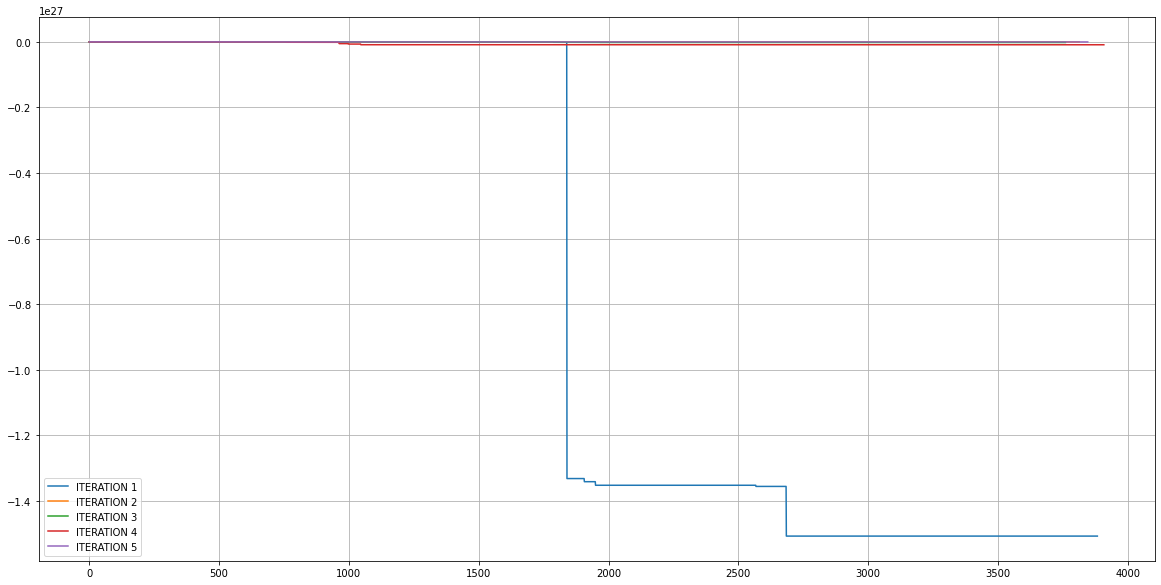

In [55]:
fig = plt.figure(figsize=(20,10))
legend = list()
for iteration, best_score_iteration in enumerate(best_scores_evolutions):
    plt.plot(best_score_iteration)
    legend.append(f'ITERATION {iteration + 1}')
plt.legend(legend)
plt.grid()
plt.show()

## 2. EQUATION

In [63]:
params = {
    'x': Parameters.suggest_float(-100, 100),
    'y': Parameters.suggest_float(-100, 100),
    'z': Parameters.suggest_float(-100, 100),
    'k': Parameters.suggest_float(-100, 100)
}

def objective(individual):
    x = individual['x']
    y = individual['y']
    z = individual['z']
    k = individual['k']

    return np.cos(x) * np.cos(y) * np.cos(z) * np.cos(k)

In [64]:
best_scores = list()
best_scores_evolutions = list()
for iteration in range(iterations):
    print(f'ITERATION {iteration + 1}')
    environment = Environment(
        params=params,
        verbose=0
    )
    results = environment.optimize(objective=objective, direction=optimization_direction, timeout=optimization_time)
    
    best_score = results.best_score
    best_score_evolution = list(reversed(results.best_per_generation_dataframe['best_score'].values))
    best_scores.append(best_score)
    best_scores_evolutions.append(best_score_evolution)

ITERATION 1
ITERATION 2
ITERATION 3
ITERATION 4
ITERATION 5


In [65]:
print(f'BEST SCORES: {best_scores}')
print(f'MEAN BEST SCORE: {np.mean(best_scores)}')
print(f'MAX SCORE: {np.max(best_scores)}')
print(f'MIN SCORE: {np.min(best_scores)}')
print(f'STD SCORES: {np.std(best_scores)}')

BEST SCORES: [-0.9999571540854071, -0.9999957291085184, -0.9999830982612101, -0.999935191839478, -0.9999685058665505]
MEAN BEST SCORE: -0.9999679358322329
MAX SCORE: -0.999935191839478
MIN SCORE: -0.9999957291085184
STD SCORES: 2.0933731270107305e-05


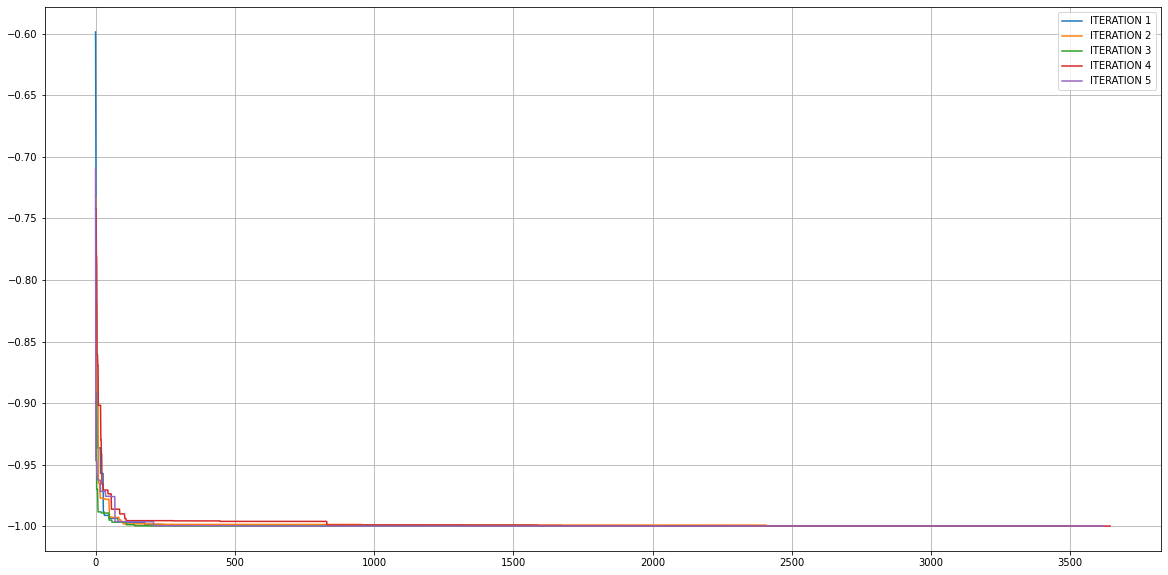

In [66]:
fig = plt.figure(figsize=(20,10))
legend = list()
for iteration, best_score_iteration in enumerate(best_scores_evolutions):
    plt.plot(best_score_iteration)
    legend.append(f'ITERATION {iteration + 1}')
plt.legend(legend)
plt.grid()
plt.show()

# RESULTS

| EQUATIONS   | BEST_SCORE             | WORST_SCORE            | MEAN_SCORE              | STD_SCORES             |
|-------------|------------------------|------------------------|-------------------------|------------------------|
| 1. EQUATION | -5.593052897256293e+26 | -9.784457226929366e+21 | -1.1787250956286476e+26 | 2.210172921843152e+26  |
| 2. EQUATION | -0.9999957291085184    | -0.999935191839478     | -0.9999679358322329     | 2.0933731270107305e-05 |